In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("export_data/wandb_export_2025-03-26T14_05_02.279-07_00.csv")
df

,Step,ESM2_nopos - train_loss,ESM2_nopos - train_loss__MIN,ESM2_nopos - train_loss__MAX,ESM_768emb - train_loss,ESM_768emb - train_loss__MIN,ESM_768emb - train_loss__MAX,ESM2_ep32 - train_loss,ESM2_ep32 - train_loss__MIN,ESM2_ep32 - train_loss__MAX,...,esm2_8l_lower_lr - train_loss__MAX,esm2_650M - train_loss,esm2_650M - train_loss__MIN,esm2_650M - train_loss__MAX,random_base - train_loss,random_base - train_loss__MIN,random_base - train_loss__MAX,esm2_base - train_loss,esm2_base - train_loss__MIN,esm2_base - train_loss__MAX
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.654005,0.654005,0.654005,0.692885,0.692885,0.692885,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.696365,0.696365,0.696365,NaN,NaN,NaN
2,4,0.637121,0.637121,0.637121,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0.616547,0.616547,0.616547,NaN,NaN,NaN,NaN,NaN,NaN,...,0.644522,0.644085,0.644085,0.644085,NaN,NaN,NaN,0.618232,0.618232,0.618232
4,7,0.606071,0.606071,0.606071,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.635556,0.635556,0.635556,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42229,181115,NaN,NaN,NaN,NaN,NaN,NaN,0.378698,0.378698,0.378698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42230,181120,NaN,NaN,NaN,NaN,NaN,NaN,0.367904,0.367904,0.367904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42231,181132,NaN,NaN,NaN,NaN,NaN,NaN,0.371551,0.371551,0.371551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42232,181133,NaN,NaN,NaN,NaN,NaN,NaN,0.403539,0.403539,0.403539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(0.37, 0.4)

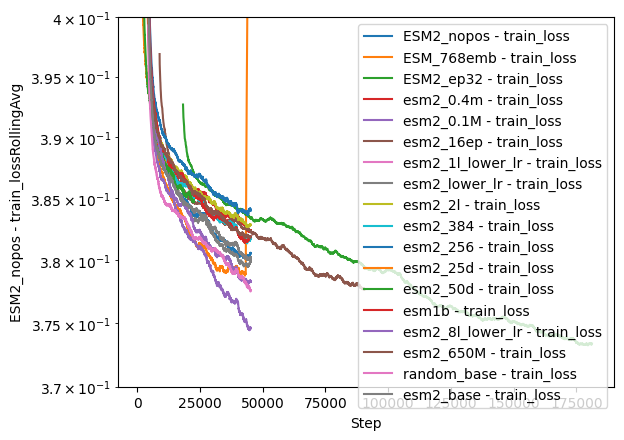

In [4]:
for col in df.columns[1:]:
    if col.endswith("train_loss"):
        sub_df = df[["Step", col]]
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=col)
ax.set_yscale('log');
ax.set_ylim([0.37, 0.4])

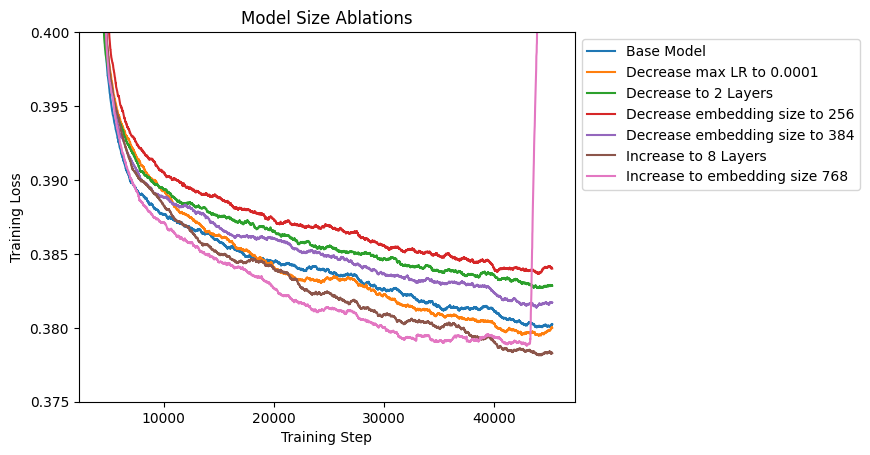

In [5]:
# Compare different data and epochs
column_map = {
    "esm2_base - train_loss": "Base Model",
    "esm2_lower_lr - train_loss": "Decrease max LR to 0.0001",
    "esm2_2l - train_loss": "Decrease to 2 Layers",
    #"esm2_1l_lower_lr - train_loss": "Decrease to 1 Layer",
    "esm2_256 - train_loss": "Decrease embedding size to 256",
    "esm2_384 - train_loss": "Decrease embedding size to 384",   
    "esm2_8l_lower_lr - train_loss": "Increase to 8 Layers",
    "ESM_768emb - train_loss": "Increase to embedding size 768",   
}


for col in column_map.keys():
        sub_df = df[["Step", col]]
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=column_map[col])
ax.set_ylim([0.375, 0.4]);
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Model Size Ablations");
ax.set_ylabel("Training Loss");
ax.set_xlabel("Training Step");
plt.savefig("training_figures/size_ablations.svg", dpi=600)

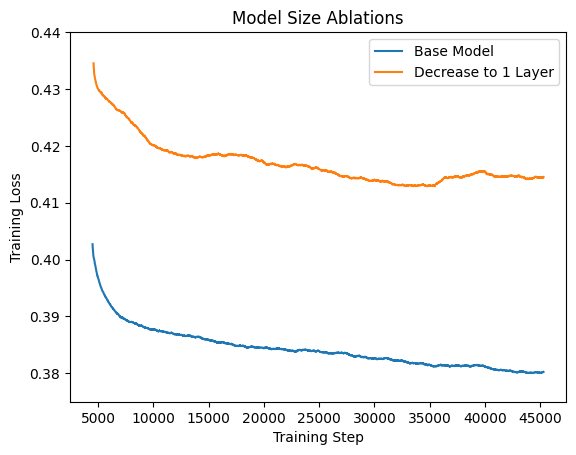

In [6]:
# Compare different data and epochs
column_map = {
    "esm2_base - train_loss": "Base Model",
    "esm2_1l_lower_lr - train_loss": "Decrease to 1 Layer",
}


for col in column_map.keys():
        sub_df = df[["Step", col]]
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=column_map[col])
ax.set_ylim([0.375, 0.44]);
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Model Size Ablations");
ax.set_ylabel("Training Loss");
ax.set_xlabel("Training Step");
plt.savefig("training_figures/size_ablations2.svg", dpi=600)


## Training Data Sizes and # of epochs

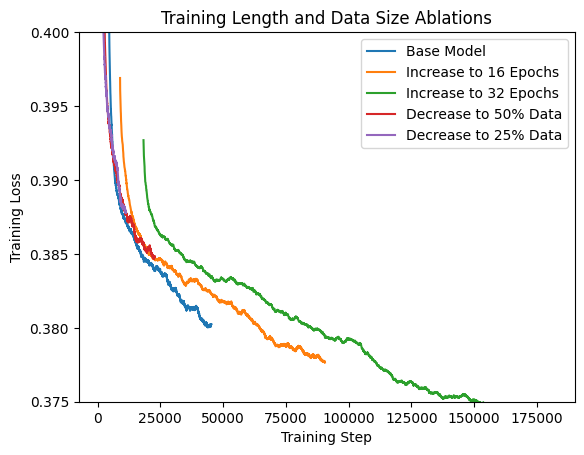

In [7]:
# Compare different data and epochs
column_map = {
    "esm2_base - train_loss": "Base Model",
    "esm2_16ep - train_loss": "Increase to 16 Epochs",
    "ESM2_ep32 - train_loss": "Increase to 32 Epochs",
    "esm2_50d - train_loss": "Decrease to 50% Data",
    "esm2_25d - train_loss": "Decrease to 25% Data",
    
    
}

for col in column_map.keys():
        sub_df = df[["Step", col]]
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=column_map[col])
ax.set_ylim([0.375, .4]);
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Training Length and Data Size Ablations");
ax.set_ylabel("Training Loss");
ax.set_xlabel("Training Step");
plt.savefig("training_figures/data_ablations.svg", dpi=600)


In [8]:
# Tokens

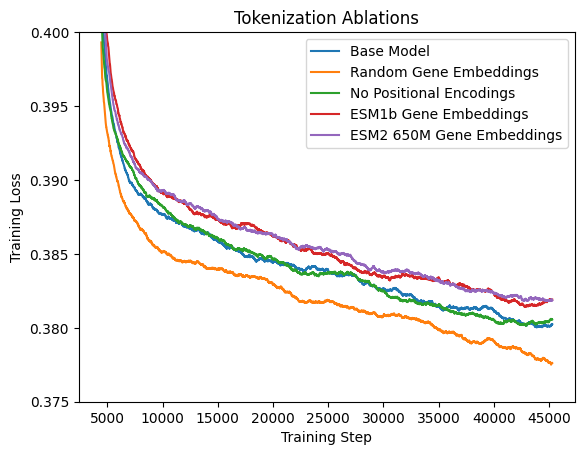

In [9]:
# Compare different data and epochs
column_map = {
    "esm2_base - train_loss": "Base Model",
    "random_base - train_loss": "Random Gene Embeddings",
    "ESM2_nopos - train_loss": "No Positional Encodings",
    "esm1b - train_loss": "ESM1b Gene Embeddings",
    "esm2_650M - train_loss": "ESM2 650M Gene Embeddings",
    
    
}

for col in column_map.keys():
        sub_df = df[["Step", col]]
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=column_map[col])
ax.set_ylim([0.375, .4]);
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Tokenization Ablations");
ax.set_ylabel("Training Loss");
ax.set_xlabel("Training Step");
plt.savefig("training_figures/token_ablations.svg", dpi=600)


In [10]:
# Masking Ablations

In [11]:
df.columns

Index(['Step', 'ESM2_nopos - train_loss', 'ESM2_nopos - train_loss__MIN',
       'ESM2_nopos - train_loss__MAX', 'ESM_768emb - train_loss',
       'ESM_768emb - train_loss__MIN', 'ESM_768emb - train_loss__MAX',
       'ESM2_ep32 - train_loss', 'ESM2_ep32 - train_loss__MIN',
       'ESM2_ep32 - train_loss__MAX', 'esm2_0.4m - train_loss',
       'esm2_0.4m - train_loss__MIN', 'esm2_0.4m - train_loss__MAX',
       'esm2_0.1M - train_loss', 'esm2_0.1M - train_loss__MIN',
       'esm2_0.1M - train_loss__MAX', 'esm2_16ep - train_loss',
       'esm2_16ep - train_loss__MIN', 'esm2_16ep - train_loss__MAX',
       'esm2_1l_lower_lr - train_loss', 'esm2_1l_lower_lr - train_loss__MIN',
       'esm2_1l_lower_lr - train_loss__MAX', 'esm2_lower_lr - train_loss',
       'esm2_lower_lr - train_loss__MIN', 'esm2_lower_lr - train_loss__MAX',
       'esm2_2l - train_loss', 'esm2_2l - train_loss__MIN',
       'esm2_2l - train_loss__MAX', 'esm2_384 - train_loss',
       'esm2_384 - train_loss__MIN', 'esm2_3

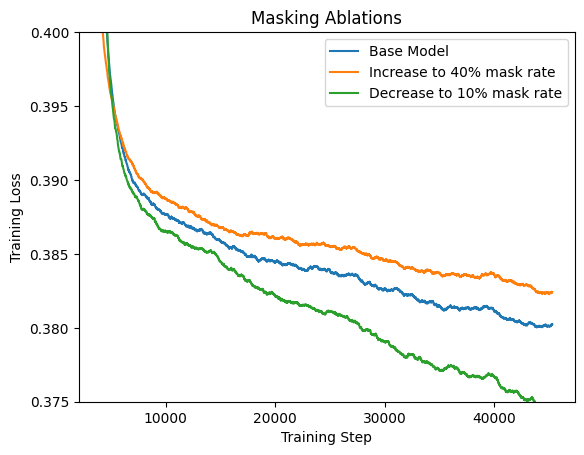

In [12]:
# Compare different data and epochs
column_map = {
    "esm2_base - train_loss": "Base Model",
    "esm2_0.4m - train_loss": "Increase to 40% mask rate",
    "esm2_0.1M - train_loss": "Decrease to 10% mask rate",
    
    
}

for col in column_map.keys():
        sub_df = df[["Step", col]]
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=column_map[col])
ax.set_ylim([0.375, .4]);
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Masking Ablations");
ax.set_ylabel("Training Loss");
ax.set_xlabel("Training Step");
plt.savefig("training_figures/masking_ablations.svg", dpi=600)


# Plot Losses

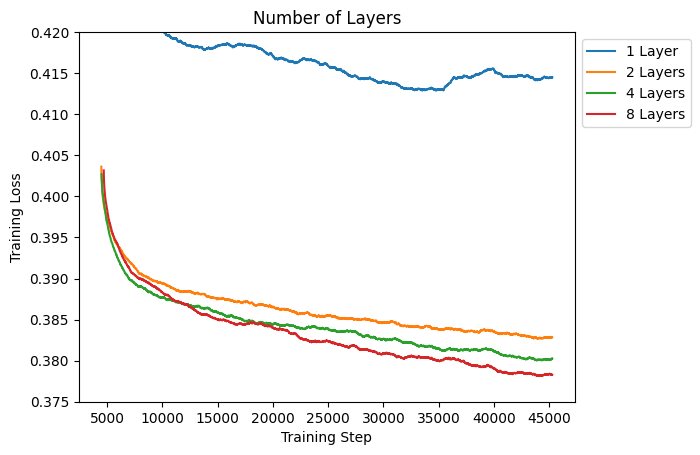

In [13]:
# Compare different data and epochs
column_map = {
    "esm2_1l_lower_lr - train_loss": "1 Layer",
    "esm2_2l - train_loss": "2 Layers",
    "esm2_base - train_loss": "4 Layers",
    "esm2_8l_lower_lr - train_loss": "8 Layers",
 
}


for col in column_map.keys():
        sub_df = df[["Step", col]]
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=column_map[col])
ax.set_ylim([0.375, 0.42]);
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Number of Layers");
ax.set_ylabel("Training Loss");
ax.set_xlabel("Training Step");
plt.savefig("training_figures/layer_ablations_train.svg", dpi=600)

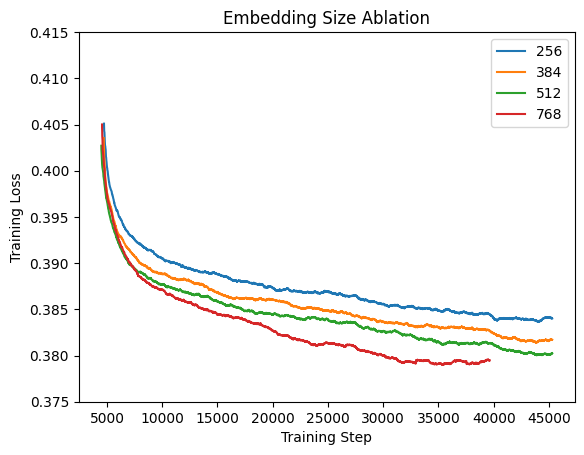

In [14]:
# Compare different data and epochs
column_map = {

    "esm2_256 - train_loss": "256",
    "esm2_384 - train_loss": "384",   
    "esm2_base - train_loss": "512",
    "ESM_768emb - train_loss": "768",   
}


for col in column_map.keys():
        sub_df = df[["Step", col]]
        if "768" in col:
            sub_df = sub_df[sub_df["Step"] <= 39634] # Cut off before last epoch because it diverged during training
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=column_map[col])
ax.set_ylim([0.375, 0.415]);
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Embedding Size Ablation");
ax.set_ylabel("Training Loss");
ax.set_xlabel("Training Step");
plt.savefig("training_figures/emb_ablations_train.svg", dpi=600)

/tmp/user/21290/ipykernel_913729/1345558351.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1, 1))


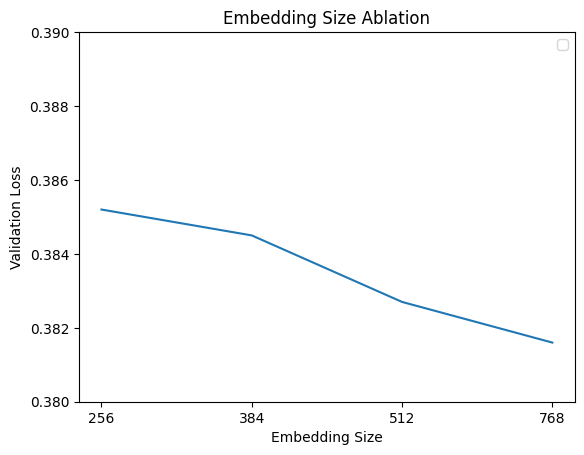

In [15]:
# Compare different data and epochs
val_losses = pd.DataFrame([
    ["256",0.3852],
    ["384",0.3845],
    ["512",0.3827],
    ["768",0.3816],
    ], columns=["Embedding Size", "Validation loss"])

ax = sns.lineplot(data=val_losses, x="Embedding Size", y="Validation loss")

ax.set_ylim([0.38, 0.39]);


ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Embedding Size Ablation");
ax.set_ylabel("Validation Loss");
ax.set_xlabel("Embedding Size");
plt.savefig("training_figures/emb_ablations_val.svg", dpi=600)

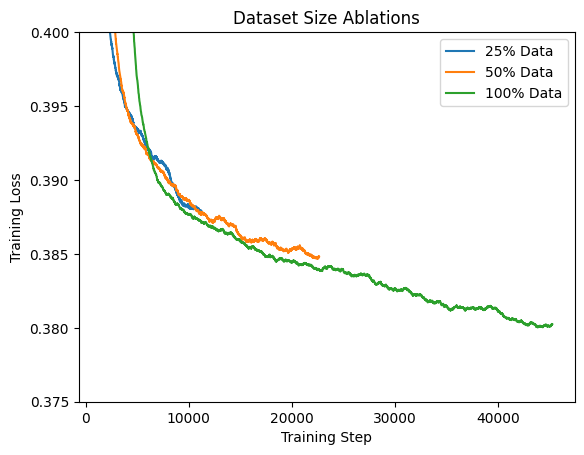

In [16]:
# Compare different data and epochs
column_map = {
    "esm2_25d - train_loss": "25% Data",
    "esm2_50d - train_loss": "50% Data",
    "esm2_base - train_loss": "100% Data",
}

for col in column_map.keys():
        sub_df = df[["Step", col]]
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=column_map[col])
ax.set_ylim([0.375, .4]);
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Dataset Size Ablations");
ax.set_ylabel("Training Loss");
ax.set_xlabel("Training Step");
plt.savefig("training_figures/data_ablations_train.svg", dpi=600)


/tmp/user/21290/ipykernel_913729/3649061904.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1, 1))


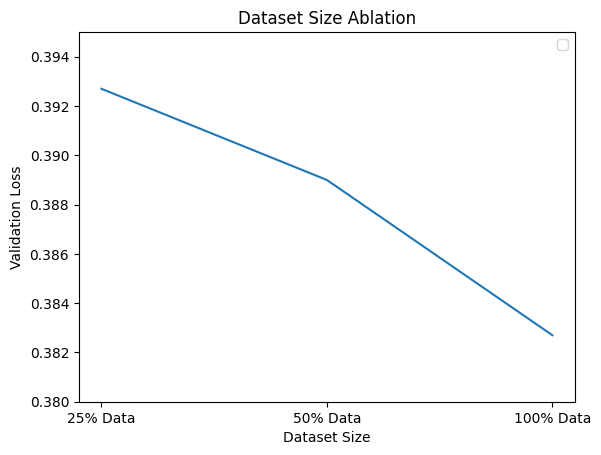

In [17]:
# Compare different data and epochs
val_losses = pd.DataFrame([
    ["25% Data",0.3927],
    ["50% Data",0.3890],
    ["100% Data",0.3827],
    ], columns=["Dataset Size", "Validation loss"])

ax = sns.lineplot(data=val_losses, x="Dataset Size", y="Validation loss")

ax.set_ylim([0.38, 0.395]);


ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Dataset Size Ablation");
ax.set_ylabel("Validation Loss");
ax.set_xlabel("Dataset Size");
plt.savefig("training_figures/data_ablations_val.svg", dpi=600)

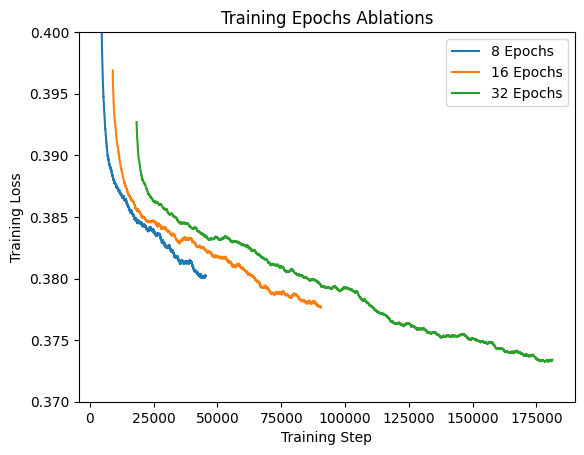

In [18]:
# Compare different data and epochs
column_map = {
    "esm2_base - train_loss": "8 Epochs",
    "esm2_16ep - train_loss": "16 Epochs",
    "ESM2_ep32 - train_loss": "32 Epochs",

    
    
    
}

for col in column_map.keys():
        sub_df = df[["Step", col]]
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=column_map[col])
ax.set_ylim([0.37, .4]);
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Training Epochs Ablations");
ax.set_ylabel("Training Loss");
ax.set_xlabel("Training Step");
plt.savefig("training_figures/epochs_ablations_train.svg", dpi=600)


/tmp/user/21290/ipykernel_913729/1830293484.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1, 1))


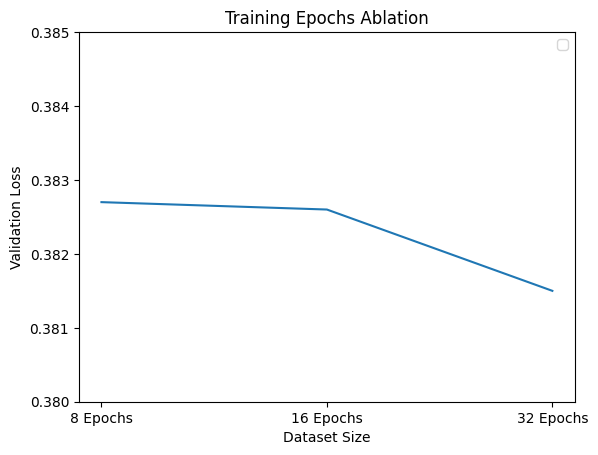

In [19]:
# Compare different data and epochs
val_losses = pd.DataFrame([
    ["8 Epochs",0.3827],
    ["16 Epochs",0.3826],
    ["32 Epochs",0.3815],
    ], columns=["Dataset Size", "Validation loss"])

ax = sns.lineplot(data=val_losses, x="Dataset Size", y="Validation loss")

ax.set_ylim([0.38, 0.385]);


ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Training Epochs Ablation");
ax.set_ylabel("Validation Loss");
ax.set_xlabel("Dataset Size");
plt.savefig("training_figures/epochs_ablations_val.svg", dpi=600)

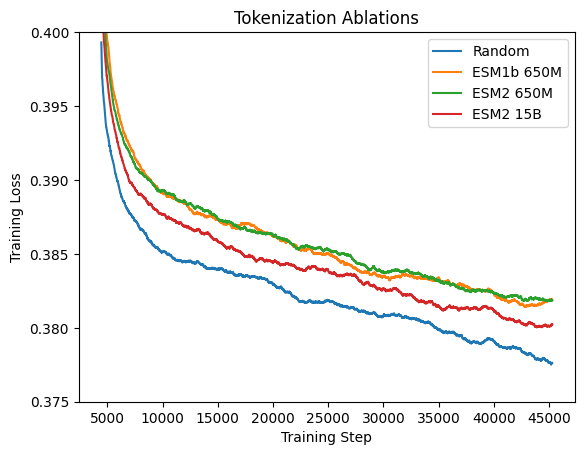

In [20]:
# Compare different data and epochs
column_map = {
    "random_base - train_loss": "Random",
    "esm1b - train_loss": "ESM1b 650M",
    "esm2_650M - train_loss": "ESM2 650M",
    "esm2_base - train_loss": "ESM2 15B",
   
    #"ESM2_nopos - train_loss": "No Positional Encodings",
        
    
}

for col in column_map.keys():
        sub_df = df[["Step", col]]
        not_nan = np.where(~np.isnan(sub_df[col]))[0]
        sub_df = sub_df.iloc[not_nan]
        
        rolling_window = 1000

        
        sub_df[col+'RollingAvg'] = sub_df[col].rolling(window=rolling_window).mean()
        ax = sns.lineplot(sub_df, x="Step", y=col+'RollingAvg', label=column_map[col])
ax.set_ylim([0.375, .4]);
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Tokenization Ablations");
ax.set_ylabel("Training Loss");
ax.set_xlabel("Training Step");
plt.savefig("training_figures/token_ablations_train.svg", dpi=600)


### Validation loss plot

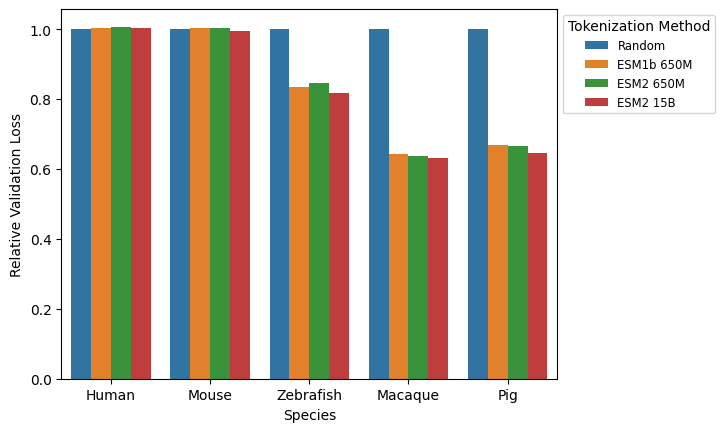

In [21]:

val_losses = pd.DataFrame([
    ["Random", 0.3818, 0.3899, 0.5151, 0.7259, 0.7140],
    ["ESM1b 650M", 0.3829, 0.3916, 0.4294, 0.4666, 0.4778],
    ["ESM2 650M", 0.3845, 0.3917, 0.4352, 0.4624, 0.4751],
    ["ESM2 15B", 0.3827, 0.3883, 0.4216, 0.4579, 0.4609],
    
    ], columns=["Tokenization", "Human", "Mouse", "Zebrafish", "Macaque", "Pig"])
val_losses

val_losses.iloc[:, 1:] = val_losses.iloc[:, 1:].astype(float) / val_losses.iloc[0, 1:].astype(float)
val_losses
val_losses = val_losses.melt(
    id_vars=["Tokenization"], 
    var_name="Species", 
    value_name="Validation Loss"
)

#fig, (ax1, ax2) = plt.subplots(
#    2, 1, sharex=True, figsize=(10, 6),
#    gridspec_kw={'height_ratios': [1, 3], 'hspace': 0.05}
#)


#ax1 = sns.barplot(data=val_losses, x="Species", y="Validation Loss", hue="Tokenization", linestyle="none", dodge=True, ax=ax1)
ax2 = sns.barplot(data=val_losses, x="Species", y="Validation Loss", hue="Tokenization", linestyle="none", dodge=True)

#ax1.set_ylim([0.65, 0.75]);
#ax2.set_ylim([0.36, 0.53]);

#ax1.spines['bottom'].set_visible(False)
#ax2.spines['top'].set_visible(False)
#ax1.tick_params(labeltop=False) 
#ax2.tick_params(labelbottom=True)

# Diagonal break lines
#d = .01
#kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)
#ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

#kwargs.update(transform=ax2.transAxes)
#ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
#ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
#ax1.get_legend().remove()

ax2.legend(
    title="Tokenization Method",
    title_fontsize='medium',  # or a number like 12
    fontsize='small',
    bbox_to_anchor=(1, 1)
)


#ax1.set_title("Tokenization Ablation");
#ax2.set_ylabel("Validation Loss");
#ax1.set_ylabel("");


#ax2.set_xlabel("Validation Dataset Species");
ax2.set_ylabel("Relative Validation Loss");

plt.savefig("training_figures/token_ablations_val.svg", dpi=600)